#### SVM实现--简易版

测试数据如下：

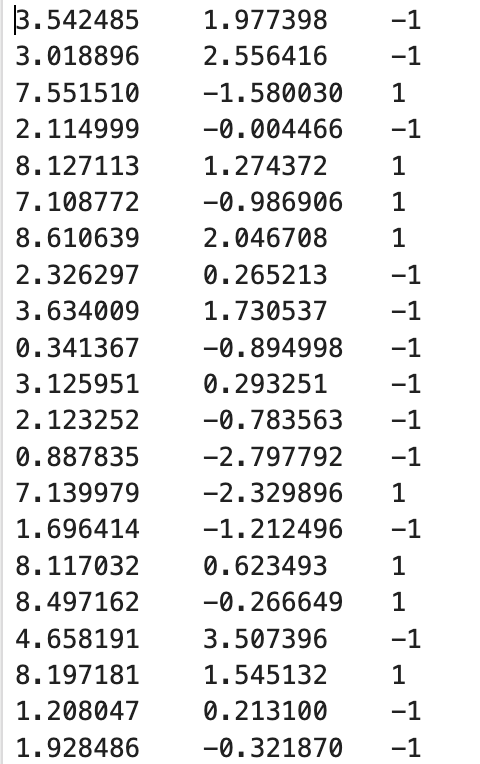

In [3]:
# （1）加载数据
def loaddata(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

In [10]:
X,y = loaddata('./data/svm1.txt')
X

[[3.542485, 1.977398],
 [3.018896, 2.556416],
 [7.55151, -1.58003],
 [2.114999, -0.004466],
 [8.127113, 1.274372],
 [7.108772, -0.986906],
 [8.610639, 2.046708],
 [2.326297, 0.265213],
 [3.634009, 1.730537],
 [0.341367, -0.894998],
 [3.125951, 0.293251],
 [2.123252, -0.783563],
 [0.887835, -2.797792],
 [7.139979, -2.329896],
 [1.696414, -1.212496],
 [8.117032, 0.623493],
 [8.497162, -0.266649],
 [4.658191, 3.507396],
 [8.197181, 1.545132],
 [1.208047, 0.2131],
 [1.928486, -0.32187],
 [2.175808, -0.014527],
 [7.886608, 0.461755],
 [3.223038, -0.552392],
 [3.628502, 2.190585],
 [7.40786, -0.121961],
 [7.286357, 0.251077],
 [2.301095, -0.533988],
 [-0.232542, -0.54769],
 [3.457096, -0.082216],
 [3.023938, -0.057392],
 [8.015003, 0.885325],
 [8.991748, 0.923154],
 [7.916831, -1.781735],
 [7.616862, -0.217958],
 [2.450939, 0.744967],
 [7.270337, -2.507834],
 [1.749721, -0.961902],
 [1.803111, -0.176349],
 [8.804461, 3.044301],
 [1.231257, -0.568573],
 [2.074915, 1.41055],
 [-0.743036, -1.73

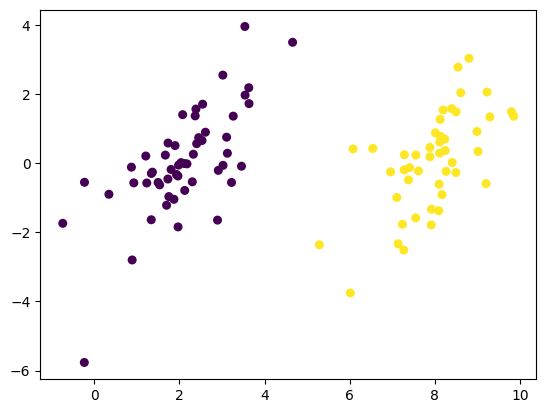

In [17]:
# （2）画散点图
import matplotlib.pyplot as plt
from numpy import *

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(array(X)[:,0],array(X)[:,1],c=array(y).squeeze(),s=30) # 按标签的不同来分类

In [18]:
# 在选定某一个alpha_i后，随机选择另一个alpha_j
def selectJrand(i,m): # m代表约束的个数，即alpha的个数
    j = i
    while(j==i):
        j = int(random.uniform(0,m))
    return j

##### SMO算法核心